# Predicting heart disease using machining learning

this notebook looks into using various python machine learning model to predict whether or not someone has heart disease based on their medical attributes 

## Data

the Datasetwas gotten from kaggle

## Evaluation 

if we can reach 95% accuracy in predicting whether or not someone has heart disease during the proof of concept, we will pursue this project

## preparing the tools

importing all tools

In [1]:
#Regular imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# models from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve

## load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data exploration


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

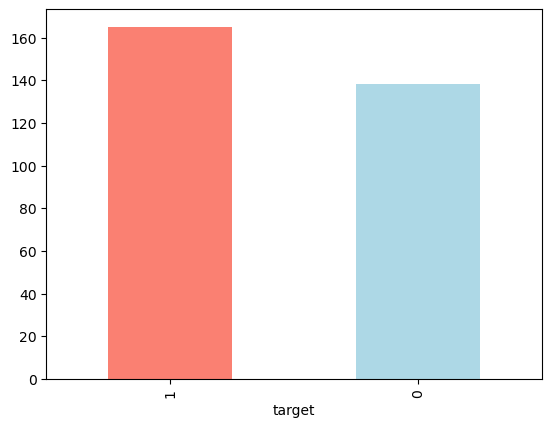

In [5]:
df["target"].value_counts().plot(kind="bar", color =["salmon", "lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# compare the sex to the target

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


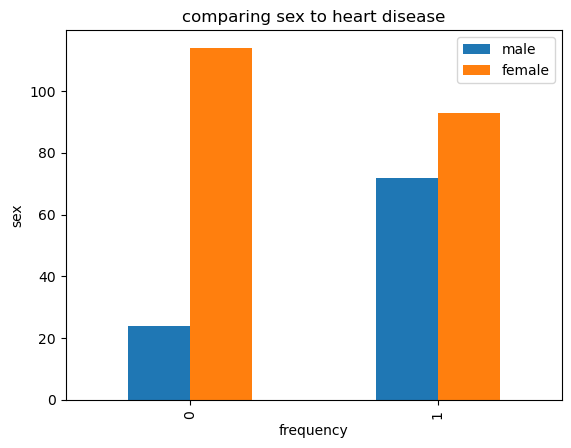

In [8]:
pd.crosstab(df.target, df.sex).plot(kind = 'bar')
plt.legend(['male', 'female'])
plt.xlabel('frequency')
plt.ylabel('sex')
plt.title('comparing sex to heart disease');

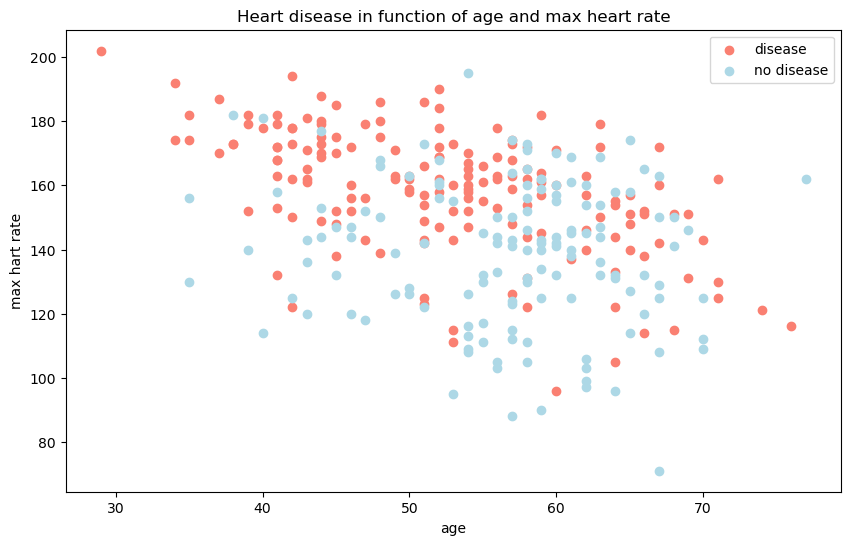

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='lightblue')
plt.title('Heart disease in function of age and max heart rate')
plt.xlabel('age')
plt.ylabel('max hart rate')
plt.legend(['disease', 'no disease']);

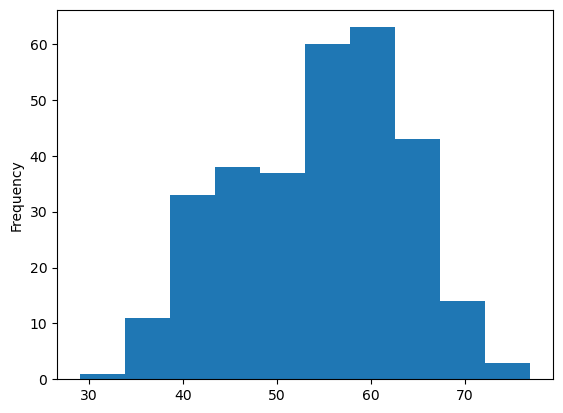

In [10]:
df.age.plot.hist();

<Axes: ylabel='Frequency'>

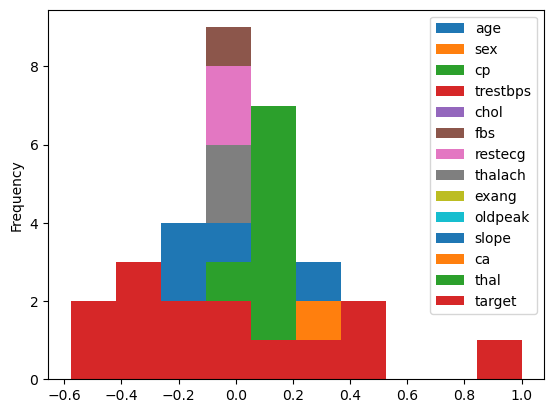

In [11]:
 # creatig a correlation matrix

df.corr().plot.hist()

#make the correlation matrix prettier

## modelling 

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
# spliting the data

x = df.drop('target', axis =1 )

y= df['target']

In [14]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [16]:
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


what model do we use

1. logistic regression
2. kneighbors
3. randomforestclassifier


In [18]:
#put models in a dictionary

models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    fit and evaluate given machine learning models
    """
    # setup random seed to retain values
    np.random.seed(42)
    #make a dictionary to keep models scores
    model_scores={}
    #loop through models
    for name, model in models.items():
        #fit the model to data
        model.fit(x_train, y_train)
        #evaluate the model and append its score to model_scores
        model_scores[name]=model.score(x_test, y_test)
    return model_scores

In [19]:
model_score = fit_and_score(models = models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_score

C:\Users\User\Documents\MLfolder\main\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [20]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)
model1.score(x_test, y_test)

C:\Users\User\Documents\MLfolder\main\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

In [21]:
model2 = KNeighborsClassifier()
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.6885245901639344

In [22]:
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)
model3.score(x_test, y_test)

0.8524590163934426

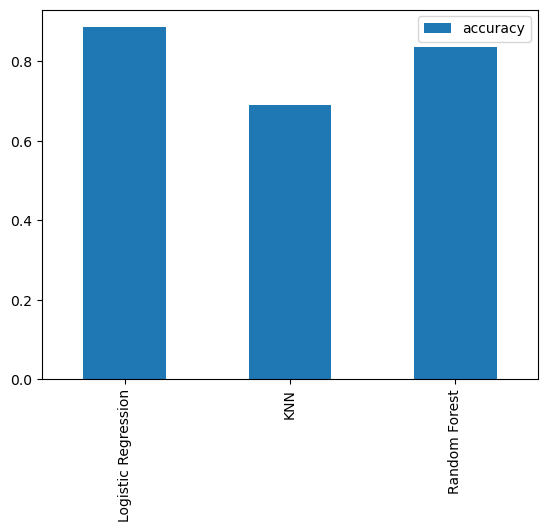

In [23]:
model_compare = pd.DataFrame(model_score, index=['accuracy'])
model_compare.T.plot.bar();

## Hyperparameter turning with randomsearchcv

In [24]:
#create a grid for logistic regressor

log_reg_grid= {
    'C': np.logspace(-4, 4, 20),
            'solver': ['liblinear']}

# create a grid for randomforestclassifier

rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
            'min_samples_split': np.arange(2, 20, 2),
             'min_samples_leaf': np.arange(1, 20, 2)}

turning this two models hyperparmeters

In [25]:
 np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                 verbose=True)

rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [26]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [27]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

now we can turn randomforest classifier

In [28]:
#set up random seed
np.random.seed(42)

# set up random search hper parameter 
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                      param_distributions=rf_grid,
                      cv=5,
                       verbose=True,
                       n_iter=20)

rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [29]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [30]:
rs_rf.score(x_test, y_test)

0.8688524590163934

now logistic regression is still better than randomforest

1. therefore will be focusing on logistic regression to build the model.

## turning using grid search cv

In [31]:
#creating a grid for grid search cv
log_reg_grid = {'C': np.logspace(-4, 4, 30),
               'solver': ['liblinear']}

#creating the gridsearchcv instance
gs_log_reg = GridSearchCV(
    LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    verbose=True
)

#fit the grid search cv to the training data
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [32]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [33]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evaluation of the model

* ROC curev and AUC curve
* confusion matrix
* classification report
* precision
* recall
* F1-score

to make comparison and evaluate, we have to make predictions first

In [34]:
# make predictions with turened model
y_preds=gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [35]:
#plot ROC curve and calculate the AUC matrix

# plot_roc_curve(gs_log_reg, x_test, y_test)

#confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [36]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation matrix usinf cross-validation

using `cross_val_score`

In [37]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [38]:
# creating a model with the best parameters
clf = LogisticRegression(
    C= 0.20433597178569418,
    solver = 'liblinear'
)

In [39]:
#cross_validating the accuratcy
cv_acc = cross_val_score(clf, 
                        x,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [40]:
# calculating the mean

np.mean(cv_acc)

0.8446994535519124

In [41]:
#cross_validating the precsion
cv_precision = cross_val_score(clf, 
                        x,
                        y,
                        cv=5,
                        scoring='precision')
np.mean(cv_precision)

0.8207936507936507

In [42]:
#cross_validating the recall
cv_recall = cross_val_score(clf, 
                        x,
                        y,
                        cv=5,
                        scoring='recall')
np.mean(cv_recall)

0.9212121212121213

In [43]:
#cross_validating the F1
cv_f1 = cross_val_score(clf, 
                        x,
                        y,
                        cv=5,
                        scoring='f1')
np.mean(cv_f1)

0.8673007976269721

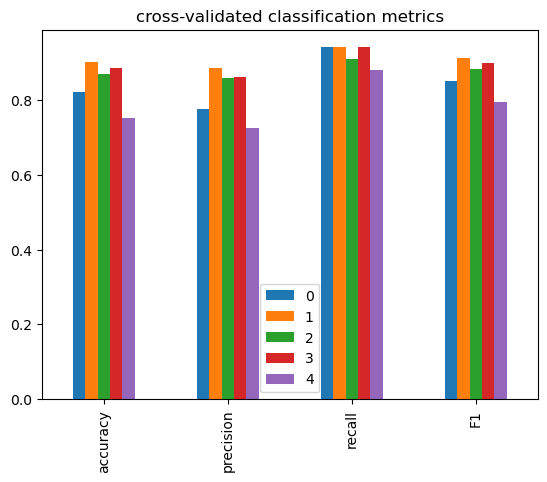

In [44]:
# visiualize cross-validated metrics

cv_metrics = pd.DataFrame({
    'accuracy': cv_acc,
    'precision': cv_precision,
    'recall': cv_recall,
    'F1': cv_f1
})
cv_metrics.T.plot.bar(title='cross-validated classification metrics', 
                     );

### feature importance

this is another way of asking, 'which features contributed most to the outcomes of the model and how it did contibute?

lets fin the features that are important
one way to find feature importance is to search for '(MODEL NAME) feature importance'

In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
#check coef_
clf.fit(x_train, y_train)
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [47]:
#matching the coef to the features

feature_dict = dict(zip(df.columns, list(clf.coef_[0])) )
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

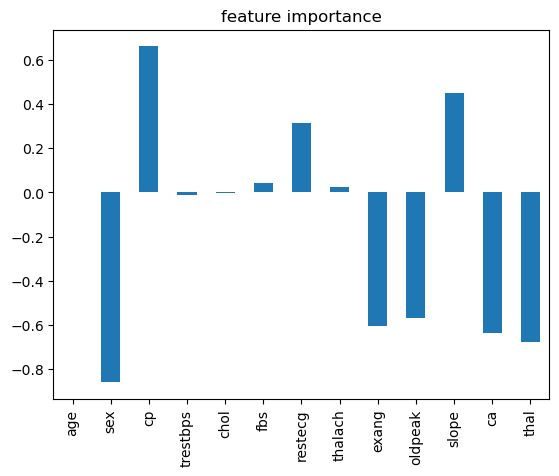

In [48]:
# visualization

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='feature importance', legend = False);


sex is the most important feature in this model
chol is the list important feature in this model